George Gao 2020 -
This notebook is for generating visualsations of the results of the ESRGAN and SemSeg models

## Inference

In [1]:
## Import Libraries


from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
import os
from torchvision import transforms
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import numpy as np
from torchvision import utils
import torch
import pandas as pd

In [2]:
#pathfinding

path = os.getcwd()
img_path = path+'/data/h5'
path_img = img_path+'/img_wmasks'
path_lbl = path+'/data/h5/masks2/'
path_infer = img_path+'/s2-hr/'
path_infer_400 = img_path+'/s2-hr-400/'
path_infer_mask = img_path+'/s2-hr-mask/'
path_val = img_path+'/s2-lr-valid/'
path_naive = img_path+'/naive/'
il_val = ImageList.from_folder(path_val)
il_naive = ImageList.from_folder(path_naive)

get_y_fn = lambda x: path_infer_mask+f'/{x.stem}.tif'
get_gtmask_fn = lambda x: path_lbl+f'/{x.stem}_mask.tif'
get_gtimg_fn = lambda x: path_img+f'/{x.stem}.png'
get_roc_fn = lambda x, suffix: img_path+'/roc/naive/'+f'{suffix}/{x.stem}.tif'
get_hr_mask = lambda x, suffix: img_path+'/roc/'+f'{suffix}/{x.stem}.tif'
get_hr_img = lambda x: path_infer_400+f'/{x.stem}.png'
get_stem = lambda x: {x.stem}

In [12]:
def get_imgs(idx):
    naive_img = transforms.ToPILImage()(il_naive[idx].data)
    naive_mask = Image.open(get_roc_fn(il_naive.items[idx], "L15"))

    hr_img = Image.open(get_hr_img(il_naive.items[idx]))
    hr_mask = Image.open(get_hr_mask(il_naive.items[idx], "L25"))

    gt_img = Image.open(get_gtimg_fn(il_naive.items[idx]))
    gt_mask = Image.open(get_gtmask_fn(il_naive.items[idx]))

    return naive_img, naive_mask, hr_img, hr_mask, gt_img, gt_mask

idx = 48

naive_img, naive_mask, hr_img, hr_mask, gt_img, gt_mask = get_imgs(idx)

Text(0.5, 1.0, 'GT Mask')

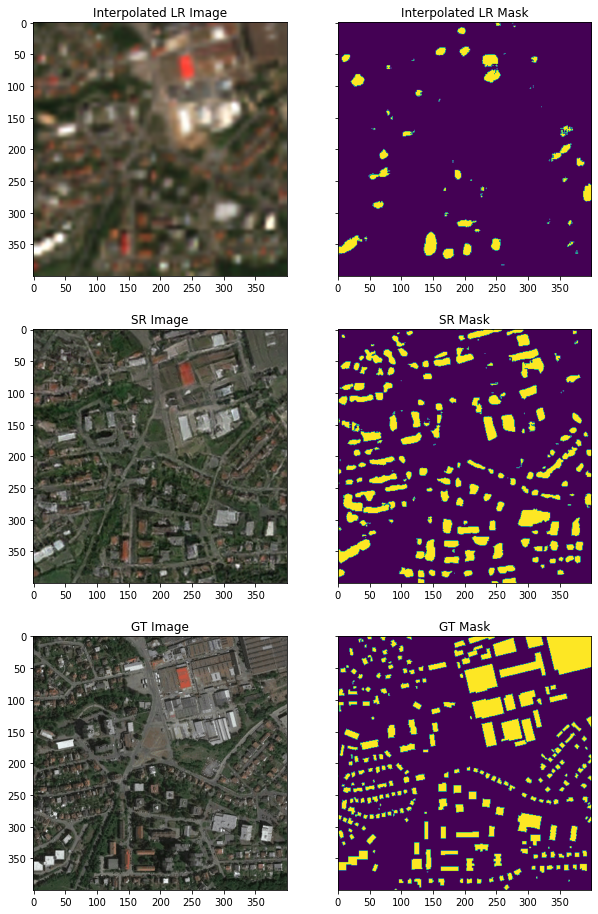

In [13]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharey=True, figsize=(10,16))
ax1.imshow(naive_img)
ax1.set_title('Interpolated LR Image')
ax2.imshow(naive_mask)
ax2.set_title('Interpolated LR Mask')

ax3.imshow(hr_img)
ax3.set_title('SR Image')
ax4.imshow(hr_mask)
ax4.set_title('SR Mask')

ax5.imshow(gt_img)
ax5.set_title('GT Image')
ax6.imshow(gt_mask)
ax6.set_title('GT Mask')

Text(0.5, 1.0, 'HR Image')

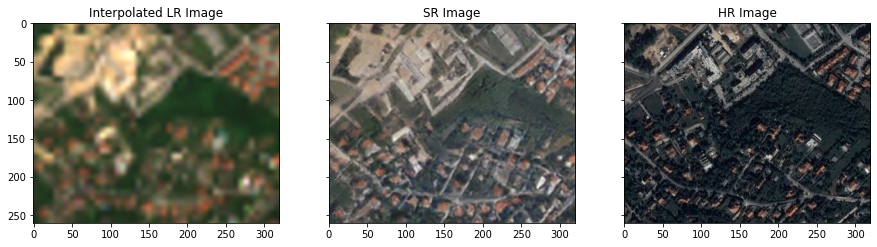

In [191]:
naive_img, naive_mask, hr_img, hr_mask, gt_img, gt_mask = get_imgs(0)
f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize=(15,5))
ax1.imshow(naive_img.crop((40, 70, 360, 330)))
ax1.set_title('Interpolated LR Image')
ax2.imshow(hr_img.crop((40, 70, 360, 330)))
ax2.set_title('SR Image')
ax3.imshow(gt_img.crop((40, 70, 360, 330)))
ax3.set_title('HR Image')


Text(0.5, 1.0, 'HR Image')

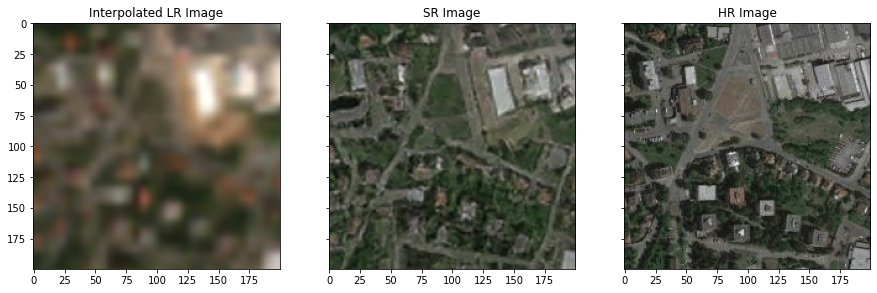

In [6]:
naive_img, naive_mask, hr_img, hr_mask, gt_img, gt_mask = get_imgs(48)
f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize=(15,5))
ax1.imshow(naive_img.crop((100, 100, 300, 300)))
ax1.set_title('Interpolated LR Image')
ax2.imshow(hr_img.crop((100, 100, 300, 300)))
ax2.set_title('SR Image')
ax3.imshow(gt_img.crop((100, 100, 300, 300)))
ax3.set_title('HR Image')

Text(0.5, 1.0, 'HR Image')

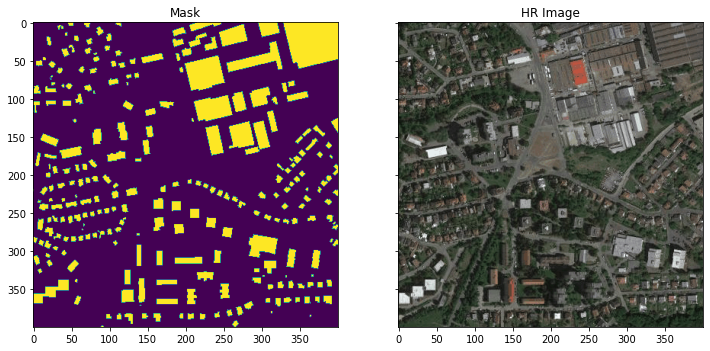

In [7]:
f, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1.imshow(gt_mask)
ax1.set_title('Mask')
ax2.imshow(gt_img)
ax2.set_title('HR Image')

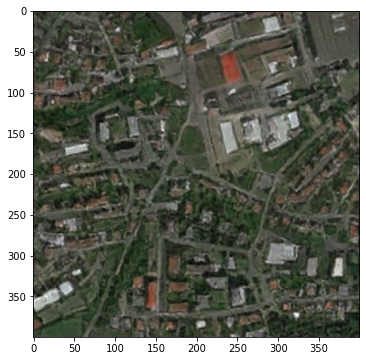

In [20]:
plt.figure(figsize=(12,6))
plt.imshow(hr_img)

Text(0.5, 1.0, 'HR Image')

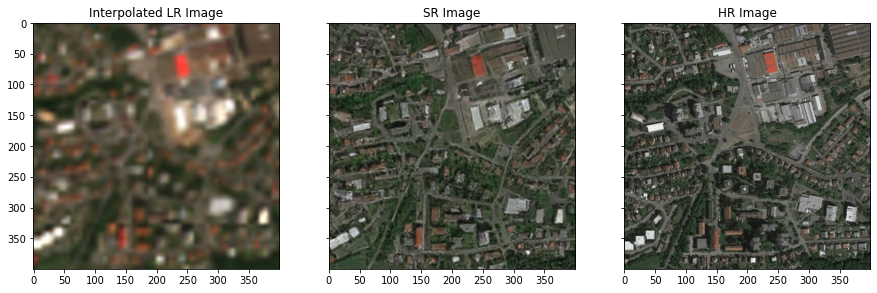

In [15]:
naive_img, naive_mask, hr_img, hr_mask, gt_img, gt_mask = get_imgs(48)
f, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize=(15,5))
ax1.imshow(naive_img)
ax1.set_title('Interpolated LR Image')
ax2.imshow(hr_img)
ax2.set_title('SR Image')
ax3.imshow(gt_img)
ax3.set_title('HR Image')

Text(0.5, 1.0, 'Worldview-2 Image')

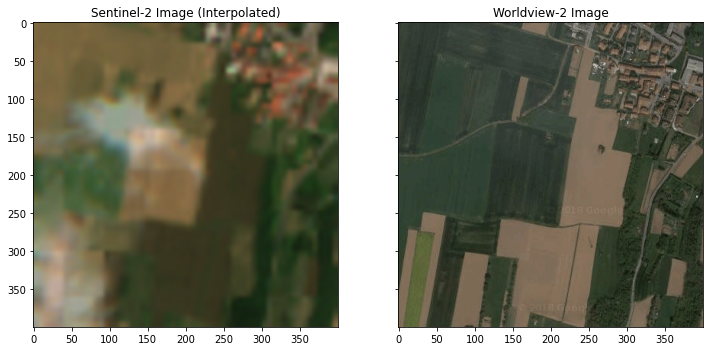

In [28]:
naive_img, naive_mask, hr_img, hr_mask, gt_img, gt_mask = get_imgs(15)

f, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1.imshow(naive_img)
ax1.set_title('Sentinel-2 Image (Interpolated)')
ax2.imshow(gt_img)
ax2.set_title('Worldview-2 Image')

In [8]:
thresh = learn.predict(il_naive[idx])[2][1]
thresh05 = Image.open(get_roc_fn(il_naive.items[idx], "L15"))
thresh03 = Image.open(get_roc_fn(il_naive.items[idx], "L15"))
thresh01 = Image.open(get_roc_fn(il_naive.items[idx], "L15"))
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True, figsize=(15,10))
ax1.imshow(thresh.numpy())
ax1.set_title('Raw output')
ax2.imshow(thresh05.numpy())
ax2.set_title('0.3 Threshold')
ax3.imshow(thresh03.numpy())
ax3.set_title('0.2 Threshold')
ax4.imshow(thresh01.numpy())
ax4.set_title('0.1 Threshold')
ax5.imshow(oldmask)
ax5.set_title('True Mask')
ax6.imshow(mask)
ax6.set_title('Original 0.5')

NameError: name 'learn' is not defined